In [399]:
import pandas as pd

In [400]:
import numpy as np

In [401]:
from matplotlib import pyplot as plt

In [402]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

In [403]:
#data = pd.read_csv('paintings_df.csv')

In [404]:
data = data.drop(columns=['dating', 'date_sold', 'inscribed','auction_house','artist','kind','lot_number','img available','signed','size','stamped',
                          'title', 'with_premium'])

KeyError: "['dating' 'date_sold' 'inscribed' 'auction_house' 'artist' 'kind'\n 'lot_number' 'img available' 'signed' 'size' 'stamped' 'title'\n 'with_premium'] not found in axis"

In [405]:
data = data.drop(data[data['auction_result'] == 'Unsold'].index)
data = data.drop(data[data.img_filename == '-'].index)
data.reset_index(drop=True, inplace=True)


/Users/adrianhishow/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [406]:
data['auction_result'] = data['auction_result'].str.split(' ')
data.head()

AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [407]:
RATES = {
    "EUR": 1.0,
    "CHF": 0.82,
    "USD": 0.85,
    "HUF":0.0034,
    "HKD":0.1,
    "CAD":0.64,
    "PLN":0.23,
    "GBP": 1.13,
    "SEK":0.1,
    "NOK":0.1,
    "SGD":0.62,
    "MXN":0.06,
    "NZD":0.56,
    "ESP":166.386,
    "THB":0.022,
    "AUD":0.61,
    "EEK":0.0639,
    "JPY":0.0080,
    "SKK":0.1,
    "VEB":0.0000001,
    "ARS":0.18,
    "PHP":0.018,
    "ILS":0.25,
    "DKK":0.13,
    "BRL":0.3,
    "ZAR":0.1,
    "AED":0.21,
}

In [408]:
def currency_to_eur(amount, currency):
    try:
        rate = RATES[currency]
        return float(amount * rate)
    except: 
        return np.nan

In [409]:
#creates a currency column
data['currency'] = data.auction_result
for i in range(0,len(data.auction_result)):
    data.currency[i] = data.currency[i][1]

IndexError: invalid index to scalar variable.

In [410]:
#
for i in range(0,len(data.auction_result)):
    data.auction_result[i] = data.auction_result[i][0]


IndexError: invalid index to scalar variable.

In [411]:
#deletes commas in auction_result 
for i in range(0,len(data.auction_result)):
    data.auction_result[i] = float(data.auction_result[i].replace(',', '') )

AttributeError: 'numpy.int64' object has no attribute 'replace'

In [412]:
data.auction_result.describe()

count    1.745800e+04
mean     1.037601e+04
std      6.043111e+04
min      0.000000e+00
25%      2.930000e+02
50%      9.360000e+02
75%      3.838750e+03
max      3.060039e+06
Name: auction_result, dtype: float64

In [413]:
#converts each auction_result to eur
for i in range(0,len(data.auction_result)):
    data['auction_result'][i] = currency_to_eur(data['auction_result'][i], 
                                                data['currency'][i])


/Users/adrianhishow/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/adrianhishow/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


KeyboardInterrupt: 

In [414]:
data.head()

,auction_result,img_filename,price_estimated,currency,auction_result_binned,auction_result_std,auction_result_binned_std
0,NaN,Blick von Posilippo über den Golf von Neapel.jpg,750 EUR,1600,1600,-0.145228,-0.233248
1,NaN,Bildnis des Botanikers Prof. Dietrich.jpg,180 EUR,160,160,-0.169057,-0.235411
2,NaN,Brandung an der Felsenküste..jpg,"8,000 - 12,000 EUR",23750,35937,0.221316,-0.181669
3,NaN,Zwei Künstler auf Wanderung.jpg,200 EUR,300,361,-0.166740,-0.235109
4,NaN,SHIPS WITH WOOD IN THE HARBOUR OF DESENZANO.jpg,"1,500 - 2,000 EUR",2070,2107,-0.137450,-0.232486


#### categorize the price col to get better predictions:

In [415]:
#current number of unuiqe prices: 
len(data['auction_result'].value_counts())

2766

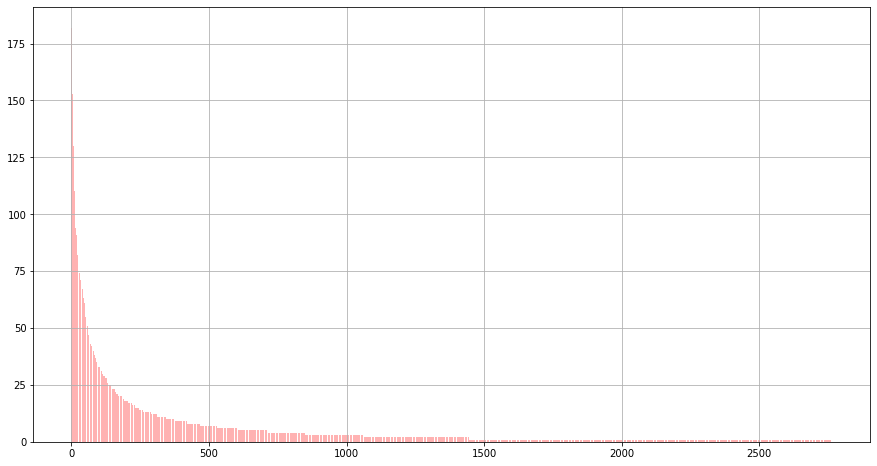

In [416]:
#plotting value_counts for auction_result:
plt.figure(figsize=(15,8))
plt.bar([i for i in range(len(data['auction_result'].value_counts()))],
            data['auction_result'].value_counts(),
           alpha = .3, color='red')

plt.grid()
plt.show()

#### making sure that the class weight for auction_result_binned is equal:

In [417]:
#creating the logistic bins:
num_bins = 20
'''
log_bins = np.logspace(1, 6, num=num_bins, 
               endpoint=True, base=10, dtype=int, 
               axis=0)
log_bins'''

'\nlog_bins = np.logspace(1, 6, num=num_bins, \n               endpoint=True, base=10, dtype=int, \n               axis=0)\nlog_bins'

In [418]:
data['auction_result'] = data['auction_result'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [419]:
array_splits = np.array_split(data['auction_result'].sort_values(), 
                              num_bins)


In [420]:
for item in array_splits:
    print('upper lim:', max(item), 'len:', len(item))

upper lim: 67.0 len: 873
upper lim: 112.0 len: 873
upper lim: 161.0 len: 873
upper lim: 220.0 len: 873
upper lim: 297.0 len: 873
upper lim: 372.0 len: 873
upper lim: 474.0 len: 873
upper lim: 595.0 len: 873
upper lim: 750.0 len: 873
upper lim: 1000.0 len: 873
upper lim: 1275.0 len: 873
upper lim: 1734.0 len: 873
upper lim: 2337.0 len: 873
upper lim: 3223.0 len: 873
upper lim: 4600.0 len: 873
upper lim: 7100.0 len: 873
upper lim: 12240.0 len: 873
upper lim: 25500.0 len: 873
upper lim: 122039.0 len: 872
upper lim: 3060039.0 len: 872


In [421]:
def get_log_bins(array):
    bins = []
    for item in array_splits:
        bins.append(max(item))
    
    return bins

In [422]:
log_bins = get_log_bins(array_splits)

In [423]:
log_bins

[67.0,
 112.0,
 161.0,
 220.0,
 297.0,
 372.0,
 474.0,
 595.0,
 750.0,
 1000.0,
 1275.0,
 1734.0,
 2337.0,
 3223.0,
 4600.0,
 7100.0,
 12240.0,
 25500.0,
 122039.0,
 3060039.0]

#### categorize auction_result with logistic bins: 

In [424]:
def categorize_auction_result(amount):
    for item in log_bins:
        if amount <= item:
            return str(item)
    return str(item)


In [425]:
data['auction_result_binned'] = data['auction_result'].map(categorize_auction_result)

In [426]:
data['auction_result_binned'].value_counts()[:-10]

1000.0     964
220.0      927
750.0      919
112.0      917
474.0      883
25500.0    882
4600.0     882
67.0       878
12240.0    875
2337.0     873
Name: auction_result_binned, dtype: int64

In [427]:
#plotting class balance for auction_result_binned
plt.figure(figsize=(12,8))

plt.barh([i for i in range(len(data['auction_result_binned'].value_counts()))],
        (data['auction_result_binned'].value_counts()), 
         color='purple', alpha=0.7, edgecolor='black')
plt.grid()
plt.title(f'class balance for \ 
auction_result_binned, bins = {num_bins}')

plt.show()

SyntaxError: EOL while scanning string literal (<ipython-input-427-34b48fa27d0a>, line 8)

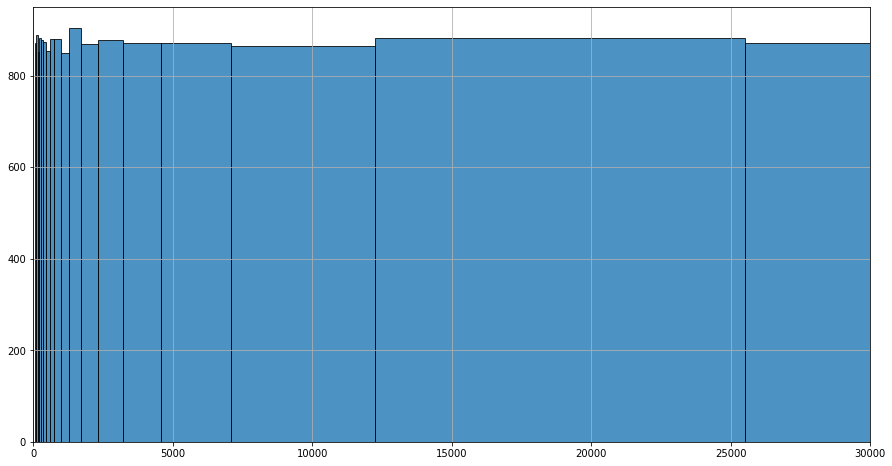

In [475]:
#binned auction_result category
plt.figure(figsize=(15,8))
plt.hist(data['auction_result'], 
         #bins=[0,100,200,300,500,700,1000,1500,2000,3000,4000,5000,7000,10000,14_000,20_000,35_000,50_000,100_000],#,200_000,500_000,1_000_000,10_000_000], 
         bins = log_bins, 
                          edgecolor='black', 
                          alpha=0.8)
plt.xlim(0,30_000)
plt.grid()
plt.show()

---

#### scale the auction_result col: 

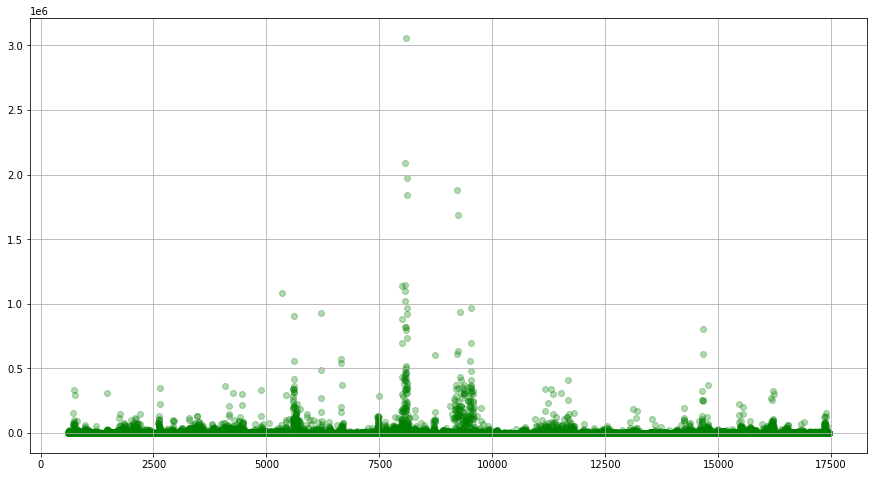

In [429]:
plt.figure(figsize=(15,8))
plt.scatter([i for i in data.index],data['auction_result']
           ,alpha = .3, color='green')

plt.grid()
plt.show()

In [430]:
scaler = StandardScaler()

scaler.fit(data[['auction_result']]) # Fit scaler to data

data['auction_result_std'] = scaler.transform(data[['auction_result']]) # Use scaler to transform data


In [431]:
#scale auction_results_binned
scaler.fit(data[['auction_result_binned']]) # Fit scaler to data

data['auction_result_binned_std'] = scaler.transform(data[['auction_result_binned']]) # Use scaler to transform data


/Users/adrianhishow/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/adrianhishow/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


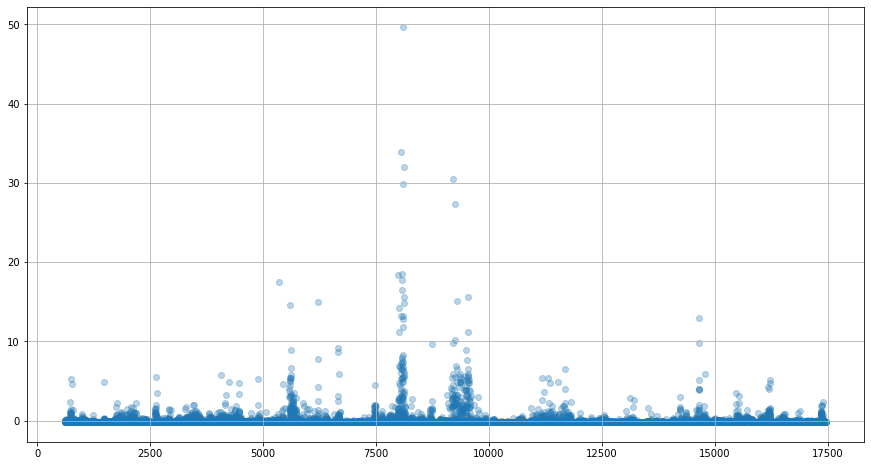

In [432]:
plt.figure(figsize=(15,8))
plt.scatter([i for i in data.index],data['auction_result_std']
           ,alpha = .3)

plt.grid()
plt.show()

In [433]:
#drop na vals: 
data = data.dropna()

In [434]:
data.shape

(16845, 7)

In [435]:
'''#convert to nd.array:
data.auction_result_std = np.asarray(data.auction_result_std)
data.auction_result_binned_std = np.asarray(data.auction_result_binned_std)
data.img_filename = np.asarray(data.img_filename)
data.auction_result_std = data.auction_result_std.astype(float)'''

'#convert to nd.array:\ndata.auction_result_std = np.asarray(data.auction_result_std)\ndata.auction_result_binned_std = np.asarray(data.auction_result_binned_std)\ndata.img_filename = np.asarray(data.img_filename)\ndata.auction_result_std = data.auction_result_std.astype(float)'

### create the cnn: 

In [436]:
from keras_preprocessing.image import ImageDataGenerator

In [437]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
path = '/Users/adrianhishow/code/adrhish/data-challenges/Art Scraper/paintings'

train_generator=datagen.flow_from_dataframe(dataframe=data, 
                                            directory=path, 
                                            x_col="img_filename", 
                                            y_col="auction_result_binned", 
                                            class_mode="categorical", 
                                            target_size=(32,32),
                                            subset='training',
                                            batch_size=16)

Found 13476 validated image filenames belonging to 20 classes.


In [438]:
validation_generator = datagen.flow_from_dataframe(dataframe=data, 
                                            directory=path, 
                                            x_col="img_filename", 
                                            y_col="auction_result_binned", 
                                            class_mode="categorical", 
                                            target_size=(32,32), 
                                            subset = 'validation', 
                                            batch_size=16)

Found 3369 validated image filenames belonging to 20 classes.


In [439]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [509]:
#for categorical price prediction: 

model = models.Sequential()

# First convolution & max-pooling
model.add(layers.Conv2D(32, (4,4), strides=(1,1), 
                        input_shape=(32,32,3), 
                        activation='relu', padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Second convolution & max-pooling
model.add(layers.Conv2D(32, (3,3), strides=(1,1), 
                        activation='relu', 
                        padding='same'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

# Flattening
model.add(layers.Flatten())

# One fully connected
model.add(layers.Dense(1024, activation='relu'))

# Last layer (classification with 30 output)
model.add(layers.Dense(num_bins, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')


In [510]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 32)        1568      
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_32 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_33 (Dense)             (None, 20)              

In [511]:
#for regressional price prediction: 
'''model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',
                 input_shape=(32,32,3) ,activation='relu' ))

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Dense(32, activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(30, activation='softmax'))
model.compile(optimizer='adam',loss='mse',metrics='mae')'''


"model = models.Sequential()\nmodel.add(layers.Conv2D(32, (3, 3), padding='same',\n                 input_shape=(32,32,3) ,activation='relu' ))\n\nmodel.add(layers.Dense(32, activation='relu'))\n\nmodel.add(layers.Dense(32, activation='relu'))\n\nmodel.add(layers.Dense(32, activation='relu'))\n\nmodel.add(layers.Flatten())\n\nmodel.add(layers.Dense(30, activation='softmax'))\nmodel.compile(optimizer='adam',loss='mse',metrics='mae')"

In [512]:
train_steps = train_generator.n//train_generator.batch_size

In [513]:
'''validation_steps = validation_generator.n//validation_generator.batch_size
validation_steps'''

'validation_steps = validation_generator.n//validation_generator.batch_size\nvalidation_steps'

In [514]:
from tensorflow.keras.callbacks import EarlyStopping

In [517]:
%%time
#€arly Stopping 
es = EarlyStopping(patience=20, restore_best_weights=True,
                  monitor='val_accuracy', mode='max', 
                   min_delta=1)

history = model.fit(train_generator, validation_data = validation_generator,
                              steps_per_epoch=100, 
                              epochs=50, callbacks= [es] )


Epoch 1/50
100/100 [==============================] - 25s 253ms/step - loss: 2.9742 - accuracy: 0.0606 - val_loss: 2.9709 - val_accuracy: 0.0662
Epoch 2/50
100/100 [==============================] - 24s 239ms/step - loss: 2.9788 - accuracy: 0.0594 - val_loss: 2.9729 - val_accuracy: 0.0668
Epoch 3/50
100/100 [==============================] - 24s 244ms/step - loss: 2.9630 - accuracy: 0.0538 - val_loss: 2.9637 - val_accuracy: 0.0816
Epoch 4/50
100/100 [==============================] - 24s 237ms/step - loss: 2.9552 - accuracy: 0.0787 - val_loss: 3.0081 - val_accuracy: 0.0493
Epoch 5/50
100/100 [==============================] - 20s 205ms/step - loss: 2.9585 - accuracy: 0.0763 - val_loss: 2.9650 - val_accuracy: 0.0608
Epoch 6/50
100/100 [==============================] - 21s 207ms/step - loss: 2.9281 - accuracy: 0.0906 - val_loss: 2.9616 - val_accuracy: 0.0674
Epoch 7/50
100/100 [==============================] - 20s 204ms/step - loss: 2.9317 - accuracy: 0.0800 - val_loss: 2.9612 - val_ac

In [527]:
models.save_model(model, 'art_cnn_basic_classification_model')

# and you can load it somewhere else :
#loaded_model = models.load_model('my_model')

INFO:tensorflow:Assets written to: art_cnn_basic_classification_model/assets


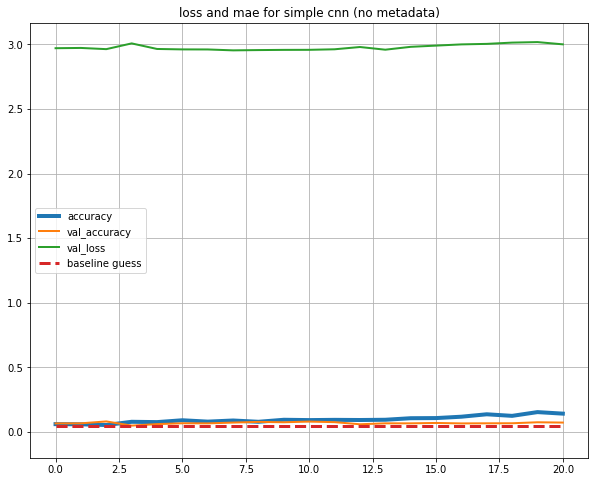

In [525]:
plt.figure(figsize=(10,8))

plt.title('loss and mae for simple cnn (no metadata)')

#model accuracy
plt.plot(history.history['accuracy'], label='accuracy', 
         linewidth=4)

#val_accuracy
plt.plot(history.history['val_accuracy'], label='val_accuracy', 
         linewidth=2)

#val_accuracy
plt.plot(history.history['val_loss'], label='val_loss', 
         linewidth=2)

#baseline
plt.plot([i for i in range(len(history.history['accuracy']))],
         [1/len(data['auction_result_binned'].value_counts()) 
          for i in range(len(history.history['accuracy']))], 
         label='baseline guess', linewidth=3, linestyle='dashed')

plt.legend(loc='center left')
plt.ylim(-0.2)
plt.grid()

plt.show()